# 姿态解算的原理介绍
## 1.1 测量？测不准！公式推导？推不对！噪声无处不在
    在现实生活中，我们如果想测量一个物体的长度，最直接的方法是使用直尺得出物体的长度可是，总有偶然因素影响我们的测量的准确性或是金属尺的热胀冷缩，或是测量者自身的度数视角又
   



In [200]:
import numpy as np
#过程噪声的协方差矩阵
Matrix_Q=np.array([[1,0],[0,1]])
#测量噪声的协方差矩阵
Matrix_R=np.array([[0.1,0],[0,0.1]])
#先验结果的计算参数矩阵
Matrix_A=np.array([[1,1],[0,1]])
#测量结果的计算参数矩阵呢
Matrix_H=np.array([[1,0],[0,1]])
#单位矩阵
Matrix_E=np.array([[1,0],[0,1]])

In [201]:
#X1为位置X2为速度  Z1,Z2为测量值
class Kalman_Filter:
    def __init__(self,accurate_last,aftsci_last,pk_last) :
        self.process_error_X1X2=np.random.randn(2,1)#随机生成的标准差为1的噪声
        self.accurate_X1X2=np.dot(Matrix_A,accurate_last)+self.process_error_X1X2
        self.measure_error_Z1Z2=np.random.normal(0, 0.316, 2).reshape(2,1)#随机生成的标准差为0.316的噪声
        self.measure_Z1Z2= self.accurate_X1X2+self.measure_error_Z1Z2
        self.presci_X1pX2p=None
        self.aftsci_X1aX2a=None
    def pre_estimate(self,aftsci_last):
        self.presci_X1pX2p=np.dot(Matrix_A,aftsci_last)
        return self.presci_X1pX2p
    def pk_calculation(self,pk_last):
        product=np.dot(Matrix_A,pk_last)
    
        pk=np.dot(product,Matrix_A.T)+Matrix_Q
        return pk
    def KalGain_calculation(self,pk):
        Kk_up=np.dot(pk,Matrix_H.T)
        Kk_down=np.dot(np.dot(Matrix_H,pk),Matrix_H.T)+Matrix_R
        Kk=np.dot(Kk_up,np.linalg.inv(Kk_down))
        return Kk
    def aft_estimate(self,Kk):
        minus=self.measure_Z1Z2-np.dot(Matrix_H,self.presci_X1pX2p)
        self.aftsci_X1aX2a=self.presci_X1pX2p+np.dot(Kk,minus)
        return self.aftsci_X1aX2a
    def pk_after_calculation(self,pk,Kk):
        pk_after=np.dot(Matrix_E-np.dot(Kk,Matrix_H),pk)
        return pk_after


In [202]:
#单独定义初值
Kal=Kalman_Filter(accurate_last=[[0],[1]],aftsci_last=[[0],[1]],pk_last=[[1,0],[0,1]]) 
Kal.pre_estimate([[0],[1]])
pre=Kal.presci_X1pX2p
pk=Kal.pk_calculation([[1,0],[0,1]])
Kk=Kal.KalGain_calculation(pk)
aft=Kal.aft_estimate(Kk)
acc_last=Kal.accurate_X1X2
print(pre)#打印预测值
print(Kal.measure_Z1Z2)#打印测量值
print(Kal.accurate_X1X2)#打印真实值
print(aft)#打印修正值
pk_after=Kal.pk_after_calculation(pk,Kk)
print(pk_after)#打印修正值

measv=[]#存放测量值的数组
presv=[]#存放预测值的数组
accsv=[]#存放准确值的数组
aftsv=[]#存放后验值的数组
measx=[]#存放测量值的数组
presx=[]#存放预测值的数组
accsx=[]#存放准确值的数组
aftsx=[]#存放后验值的数组

#开始循环
for i in range(10):
    
    #循环值
    Kal=Kalman_Filter(accurate_last=acc_last,aftsci_last=aft,pk_last=pk_after) 
    Kal.pre_estimate(aft)
    pre=Kal.presci_X1pX2p
    pk=Kal.pk_calculation(pk_after)
    Kk=Kal.KalGain_calculation(pk)
    aft=Kal.aft_estimate(Kk)
    acc_last=Kal.accurate_X1X2
    pk_after=Kal.pk_after_calculation(pk,Kk)
    #打印值
    print(i)
    print("准确值位置", end = ' ') 
    print(Kal.accurate_X1X2[0][0])#打印真实值
    print("后验估计位置", end = ' ') 
    print(aft[0][0])              #打印修正值
    print("准确值速度", end = ' ') 
    print(Kal.accurate_X1X2[1][0])#打印真实值
    print("后验估计速度", end = ' ') 
    print(aft[1][0])              #打印修正值
    #存放值
    measv.append(Kal.measure_Z1Z2[1][0])#存放测量值的数组
    presv.append(Kal.presci_X1pX2p[1][0])#存放预测值的数组
    accsv.append(Kal.accurate_X1X2[1][0])#存放准确值的数组
    aftsv.append(aft[1][0])#存放后验值的数组
    measx.append(Kal.measure_Z1Z2[0][0])#存放测量值的数组
    presx.append(Kal.presci_X1pX2p[0][0])#存放预测值的数组
    accsx.append(Kal.accurate_X1X2[0][0])#存放准确值的数组
    aftsx.append(aft[0][0])#存放后验值的数组
  
    i+=1

[[1]
 [1]]
[[ 1.7314887 ]
 [-0.11426097]]
[[ 1.37382804]
 [-0.63566043]]
[[ 1.6833873 ]
 [-0.03829549]]
[[0.09618875 0.00181488]
 [0.00181488 0.09437387]]
0
准确值位置 0.3651671720679842
后验估计位置 0.08463265315430468
准确值速度 -1.182340000087109
后验估计速度 -0.9661421209457481
1
准确值位置 0.13717272109437884
后验估计位置 0.13701907282432924
准确值速度 -1.3782291765730057
后验估计速度 -1.69278801318581
2
准确值位置 -1.8024895213397292
后验估计位置 -1.5356139995732105
准确值速度 -0.6997669114073655
后验估计速度 -0.5264950358283214
3
准确值位置 -2.7986333891685415
后验估计位置 -2.845673717753068
准确值速度 -0.007179266148301222
后验估计速度 0.11694220706983338
4
准确值位置 -2.6332204703268998
后验估计位置 -2.3540951677495014
准确值速度 2.6542225078950263
后验估计速度 2.715448505312775
5
准确值位置 0.11752419406956945
后验估计位置 -0.026559161554700172
准确值速度 3.5730432167428
后验估计速度 3.168795846939508
6
准确值位置 3.77593919974278
后验估计位置 3.895506191865736
准确值速度 1.8536363771499522
后验估计速度 1.6584235966003058
7
准确值位置 3.64994081377514
后验估计位置 3.893846666150004
准确值速度 1.1101953405751632
后验估计速度 0.8449019090765675
8
准确值

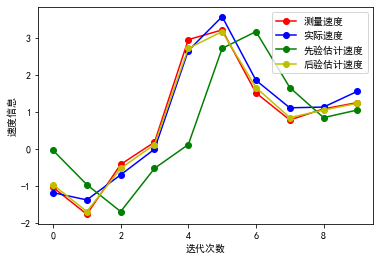

In [203]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 添加这条可以让图形显示中文
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False

x_axis_data = [i for i in range(10)]


plt.plot(x_axis_data, measv,'ro-',label='测量速度')
plt.plot(x_axis_data, accsv,'bo-', label='实际速度')
plt.plot(x_axis_data, presv,'go-',label='先验估计速度')
plt.plot(x_axis_data, aftsv,'yo-', label='后验估计速度')
plt.legend(loc="upper right")
plt.ylabel('速度信息')
plt.xlabel('迭代次数')
plt.show()


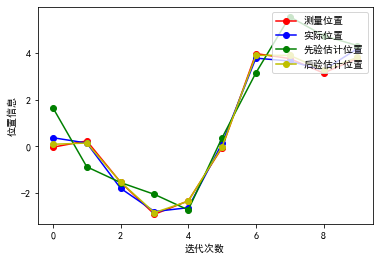

In [204]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 添加这条可以让图形显示中文
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False

x_axis_data = [i for i in range(10)]


plt.plot(x_axis_data, measx,'ro-',label='测量位置')
plt.plot(x_axis_data, accsx,'bo-', label='实际位置')
plt.plot(x_axis_data, presx,'go-',label='先验估计位置')
plt.plot(x_axis_data, aftsx,'yo-', label='后验估计位置')
plt.legend(loc="upper right")
plt.ylabel('位置信息')
plt.xlabel('迭代次数')
plt.show()